# Analysis (Simple)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import analyze_tools
from sklearn import preprocessing

df = pd.read_csv('../data/clean_game_data.csv', index_col=0)


print(df.columns)

Index(['Side', 'Region', 'Year', 'Game ID', 'Team', 'Victory', 'Game Duration',
       'Player', 'Role', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS',
       'CS in Team's Jungle', 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score',
       'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'VSPM',
       'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion',
       'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%',
       'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills',
       'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15',
       'Damage dealt to turrets', 'Total heal', 'Time ccing others',
       'Total damage taken'],
      dtype='object')


In [2]:
df.describe()

Year       Game ID  Game Duration         Kills        Deaths  \
count  65840.000000  65840.000000   65840.000000  65840.000000  65840.000000   
mean    2021.510024  36428.523694      32.719491      2.493211      2.498967   
std        1.089791   9540.604536       5.788765      2.450838      1.804162   
min     2020.000000  20708.000000      16.833000      0.000000      0.000000   
25%     2021.000000  28329.000000      28.617000      1.000000      1.000000   
50%     2021.000000  35390.500000      32.017000      2.000000      2.000000   
75%     2022.000000  44368.250000      36.033000      4.000000      4.000000   
max     2023.000000  53624.000000      70.267000     19.000000     12.000000   

            Assists           KDA            CS  CS in Team's Jungle  \
count  65840.000000  65840.000000  65840.000000         65840.000000   
mean       5.790340      5.048887    213.546598            34.873663   
std        4.109824      4.724587    111.951057            49.950538   
min        0.000000      0.000000      0.000000             0.000000   
25%        3.000000      1.300000    152.000000             1.000000   
50%        5.000000      3.300000    231.000000            12.000000   
75%        8.000000      8.000000    291.000000            37.000000   
max       32.000000     27.000000    645.000000           291.000000   

                CSM  ...  Quadra kills   Penta kills        GD@15  \
count  65840.000000  ...  65840.000000  65840.000000  65840.00000   
mean       6.538322  ...      0.006334      0.001747      0.00000   
std        3.189439  ...      0.080849      0.041757    894.93387   
min        0.000000  ...      0.000000      0.000000  -5208.00000   
25%        4.900000  ...      0.000000      0.000000   -506.00000   
50%        7.500000  ...      0.000000      0.000000      0.00000   
75%        9.000000  ...      0.000000      0.000000    506.00000   
max       13.200000  ...      2.000000      1.000000   5208.00000   

             CSD@15        XPD@15      LVLD@15  Damage dealt to turrets  \
count  65840.000000  65840.000000  65840.00000             65840.000000   
mean       0.000000      0.000000      0.00000              2752.477840   
std       17.009472    704.424984      0.75687              3359.463808   
min     -125.000000  -4195.000000     -4.00000                 0.000000   
25%      -10.000000   -438.000000      0.00000               286.000000   
50%        0.000000      0.000000      0.00000              1496.000000   
75%       10.000000    438.000000      0.00000              4123.000000   
max      125.000000   4195.000000      4.00000             61490.000000   

         Total heal  Time ccing others  Total damage taken  
count  65840.000000       65840.000000        65840.000000  
mean    5968.694411          17.641282        18536.930058  
std     5739.623482          14.278177         9085.180362  
min        0.000000           0.000000          445.000000  
25%     1802.000000           9.000000        11744.000000  
50%     3998.000000          15.000000        16759.500000  
75%     8557.000000          23.000000        23768.000000  
max    64434.000000         288.000000        76316.000000  

[8 rows x 43 columns]

In [3]:
# Roles possibles :
display(pd.unique(df['Role']))
# Victoires
display(pd.unique(df['Victory']))
# Régions
display(pd.unique(df['Region']))
# Années
display(pd.unique(df['Year']))

array(['TOP', 'JUNGLE', 'MID', 'ADC', 'SUPPORT'], dtype=object)

array([False,  True])

array(['WORLDS', 'LEC', 'LCK', 'LCS', 'MSI'], dtype=object)

array([2023, 2022, 2021, 2020])

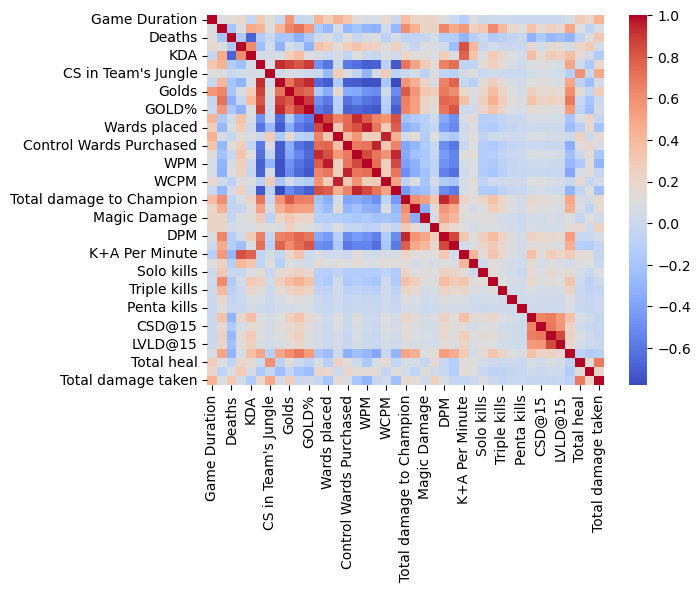

In [4]:
# Analyse de la corrélation entre les variables
numdf = df.select_dtypes(include='number').drop(columns=['Year', 'Game ID'])
analyze_tools.corr_heatmap(numdf)

In [5]:
# Listing des variables qui semblent corrélées


scaler = preprocessing.StandardScaler()
norm_data = pd.DataFrame(scaler.fit_transform(numdf), columns=numdf.columns)
corr = norm_data.corr()
for i in range(len(corr.columns)):
    for j in range(i, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7 and i < j:
            if corr.iloc[i, j] < 0:
                print(f"La variable {corr.columns[i]} est corrélée NÉGATIVEMENT avec la variable {corr.columns[j]} avec un coefficient de {corr.iloc[i, j]}")
            else:
                print(f"La variable {corr.columns[i]} est corrélée POSITIVEMENT avec la variable {corr.columns[j]} avec un coefficient de {corr.iloc[i, j]}")

La variable Kills est corrélée POSITIVEMENT avec la variable GPM avec un coefficient de 0.7124313668572255
La variable Assists est corrélée POSITIVEMENT avec la variable K+A Per Minute avec un coefficient de 0.8204297024502373
La variable KDA est corrélée POSITIVEMENT avec la variable K+A Per Minute avec un coefficient de 0.7659243736537588
La variable CS est corrélée POSITIVEMENT avec la variable CSM avec un coefficient de 0.9291370279933653
La variable CS est corrélée POSITIVEMENT avec la variable Golds avec un coefficient de 0.8687672298216952
La variable CS est corrélée POSITIVEMENT avec la variable GPM avec un coefficient de 0.8078598637412887
La variable CS est corrélée POSITIVEMENT avec la variable GOLD% avec un coefficient de 0.885455531748034
La variable CS est corrélée NÉGATIVEMENT avec la variable VS% avec un coefficient de -0.7234469929648826
La variable CS est corrélée POSITIVEMENT avec la variable Total damage to Champion avec un coefficient de 0.701512267403159
La variab

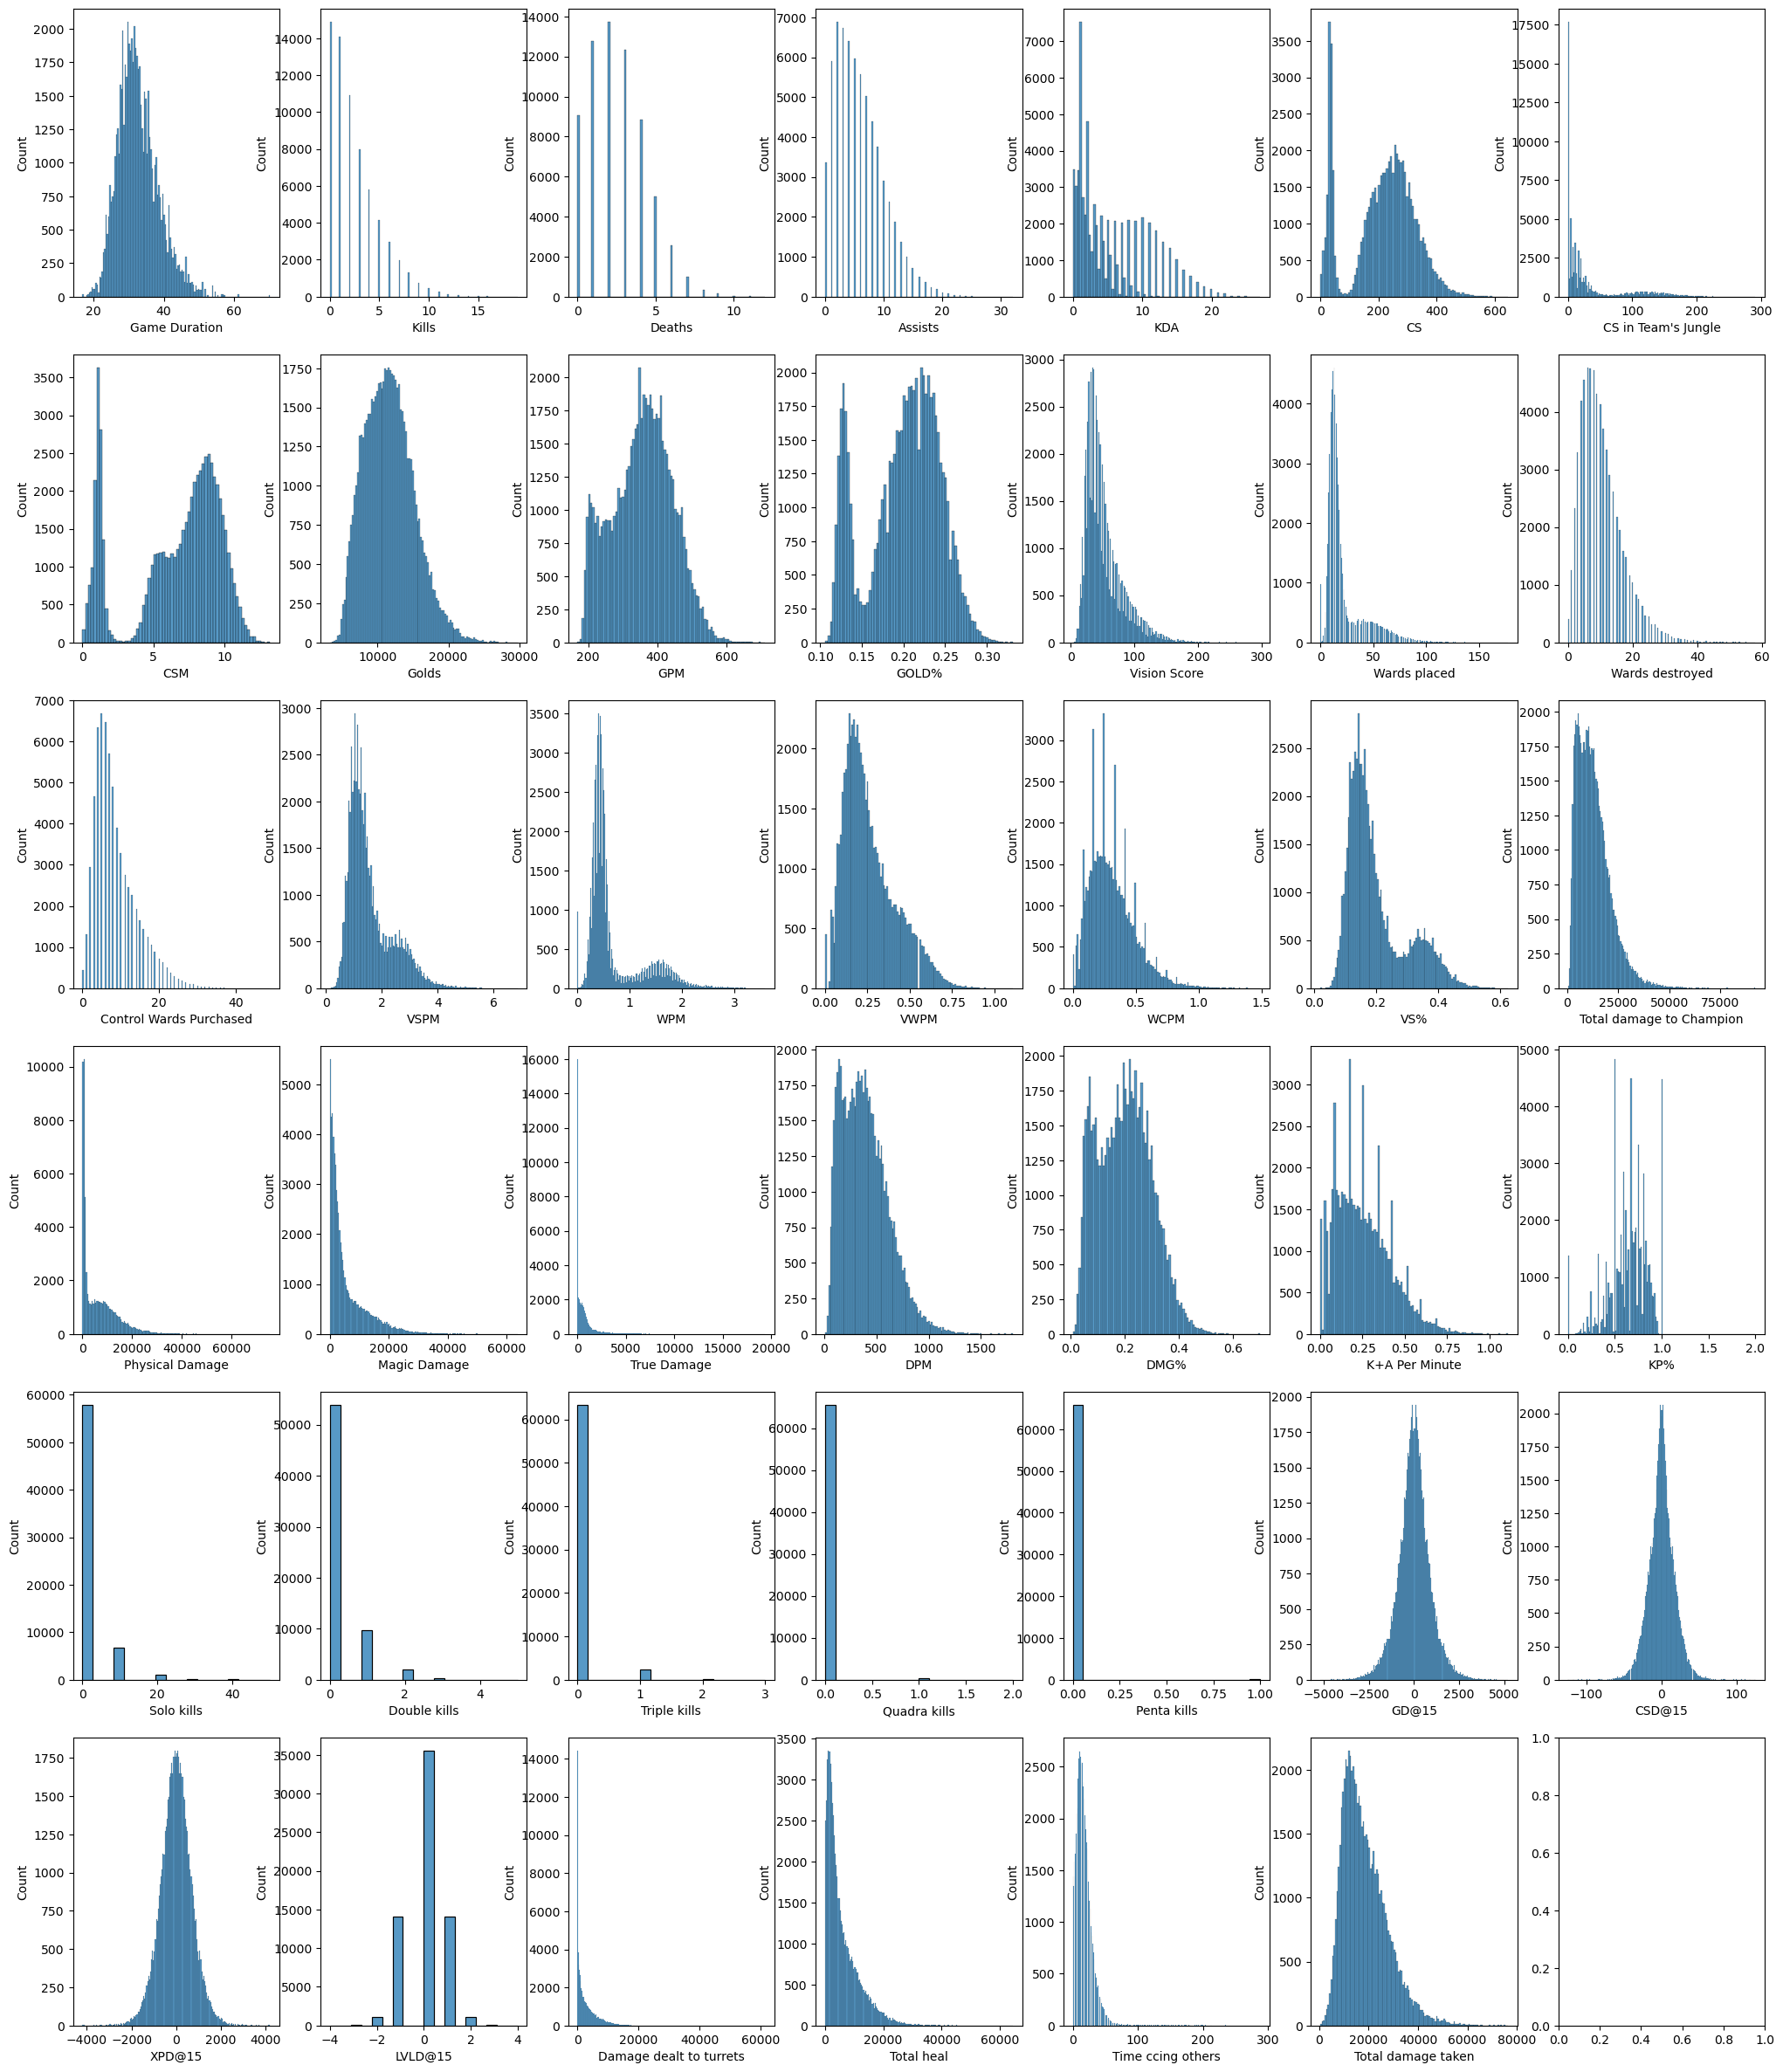

In [6]:
# Analyse de la distribution des variables

# Distribution des variables

figsize=(25, 30)
fig, axes = plt.subplots(6, 7, figsize=figsize)

i = 0
j = 0
for col in numdf.columns:
    if j != 0 and j % 7 == 0:
        i += 1
        j = 0
    sns.histplot(numdf[col], ax=axes[i, j])
    j += 1

plt.show()

Certaines variables semble avoir une distribution symétrique tel que : CSD@15, GD@15, XPD@15.
C'est dû au fait que ce sont des statistiques qui sont inversement corréllé avec l'adversaire : par exemple CSD@15 veut dire le differentiel de CS à 15 minutes par rapport à l'adversaire du même role. Avoir 15 CSD@15 veut dire que l'adversaire a -15.

Au niveau de la colonne CS, on remarque qu'il y a semblablement deux distributions. On suppose que ce sont les support dans le jeu qui ne collecte pas beaucoup de CS pour les donner à ses coéquipiers qui ont besoin de plus de gold.

## Visualisation des différence entre role et support et autre roles

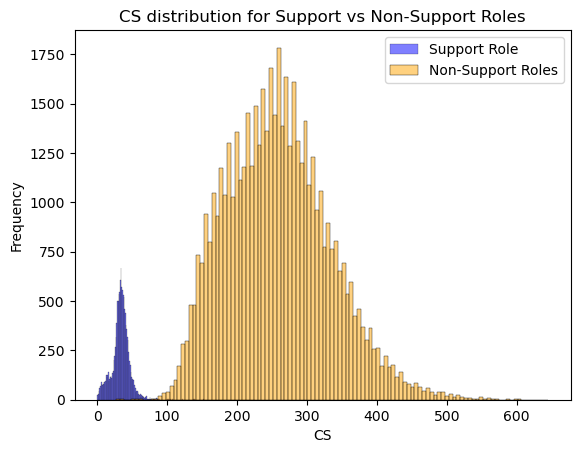

In [7]:
supportdf = df[df['Role'] == 'SUPPORT']
notsupportdf = df[df['Role'] != 'SUPPORT']

# Plotting CS distribution for support role
sns.histplot(supportdf['CS'], color='blue', alpha=0.5, label='Support Role')
sns.histplot(notsupportdf['CS'], color='orange', alpha=0.5, label='Non-Support Roles')

plt.xlabel('CS')
plt.ylabel('Frequency')
plt.title('CS distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

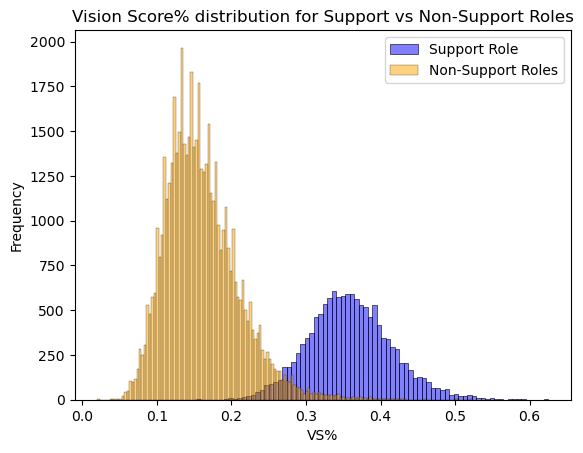

Support Role
count    13168.000000
mean         0.358990
std          0.056099
min          0.153000
25%          0.322000
50%          0.356000
75%          0.394000
max          0.625000
Name: VS%, dtype: float64
Non-Support Roles
count    52672.000000
mean         0.160252
std          0.048960
min          0.020000
25%          0.126000
50%          0.153000
75%          0.188000
max          0.523000
Name: VS%, dtype: float64


In [8]:
# Comparing VS% distribution for support and non-support roles

sns.histplot(supportdf['VS%'], color='blue', alpha=0.5, label='Support Role')
sns.histplot(notsupportdf['VS%'], color='orange', alpha=0.5, label='Non-Support Roles')

plt.xlabel('VS%')
plt.ylabel('Frequency')
plt.title('Vision Score% distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

# mean, std

print("Support Role")
print(supportdf['VS%'].describe())
print("Non-Support Roles")
print(notsupportdf['VS%'].describe())

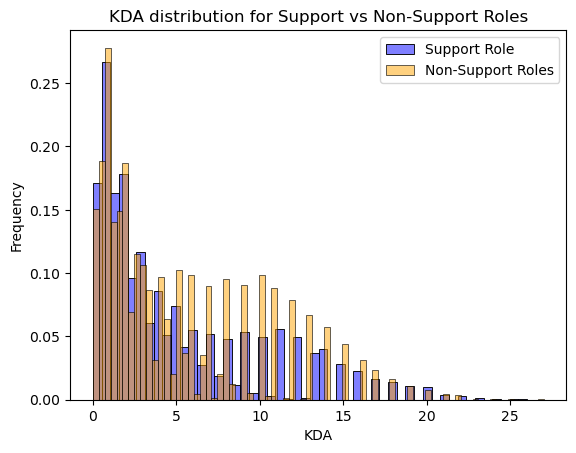

Support Role
count    13168.000000
mean         4.940067
std          4.828888
min          0.000000
25%          1.300000
50%          3.000000
75%          7.500000
max         26.000000
Name: KDA, dtype: float64
Non-Support Roles
count    52672.000000
mean         5.076092
std          4.697803
min          0.000000
25%          1.300000
50%          3.300000
75%          8.000000
max         27.000000
Name: KDA, dtype: float64


In [9]:
# Comparing KDA distribution for support and non-support roles, normalized to percentage of population

sns.histplot(supportdf['KDA'], color='blue', alpha=0.5, label='Support Role', stat='density')
sns.histplot(notsupportdf['KDA'], color='orange', alpha=0.5, label='Non-Support Roles', stat='density')

plt.xlabel('KDA')
plt.ylabel('Frequency')
plt.title('KDA distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

# mean, std

print("Support Role")
print(supportdf['KDA'].describe())
print("Non-Support Roles")
print(notsupportdf['KDA'].describe())

L'apport en vision du support est considérablement plus conséquent chez les support que les autres roles, tandis que les autres roles on plus de "CS" c'est à dire qu'ils ont plus accès aux "creeps" qui permettent d'obtenir des golds.

Au niveau du KDA, les support sont plus performant. Mais ça peut être interprété en partie dû au fait que les assist sont pondérés de la même manière que un kill dans cette statistique et que les personnage de support ont souvent des caractéristiques qui permettent "d'aider" les autres joueurs à faire des kills (d'où le role support).

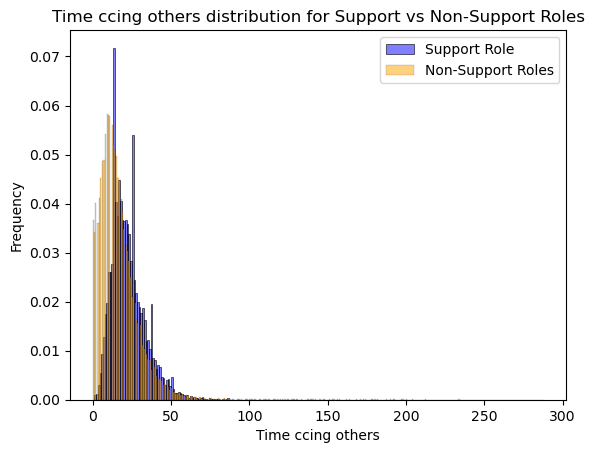

Support Role
count    13168.000000
mean        22.548830
std         11.038471
min          1.000000
25%         15.000000
50%         21.000000
75%         28.000000
max         87.000000
Name: Time ccing others, dtype: float64
Non-Support Roles
count    52672.000000
mean        16.414395
std         14.725735
min          0.000000
25%          8.000000
50%         14.000000
75%         22.000000
max        288.000000
Name: Time ccing others, dtype: float64


In [10]:
# Time ccing others for support vs non-support roles

sns.histplot(supportdf['Time ccing others'], color='blue', alpha=0.5, label='Support Role', stat='density')
sns.histplot(notsupportdf['Time ccing others'], color='orange', alpha=0.5, label='Non-Support Roles', stat='density')

plt.xlabel('Time ccing others')
plt.ylabel('Frequency')
plt.title('Time ccing others distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

# mean, std

print("Support Role")
print(supportdf['Time ccing others'].describe())

print("Non-Support Roles")
print(notsupportdf['Time ccing others'].describe())

La caractéristique du rôle de support peut aussi se retrouver au niveau du temps à "CC" les auters (c'est à dire immobiliser les adversaires, ce qui compte pour un assist si cela mène vers un kill).

In [11]:
# Verification de la corrélation du temps passé à CC les autres avec le rôle de support avec le KDA

print("Corrélation entre le temps passé à CC les autres et le KDA pour le rôle de support")
print(supportdf[['Time ccing others', 'KDA']].corr())

Corrélation entre le temps passé à CC les autres et le KDA pour le rôle de support
                   Time ccing others       KDA
Time ccing others           1.000000  0.016321
KDA                         0.016321  1.000000


Néanmoins, il semblerait que cette statistique n'a pas du tout une corrélation avec le KDA même pour les supports.

Expliquable par le fait que le KDA dépends aussi de beaucoup d'autres facteurs (kills, morts etc)

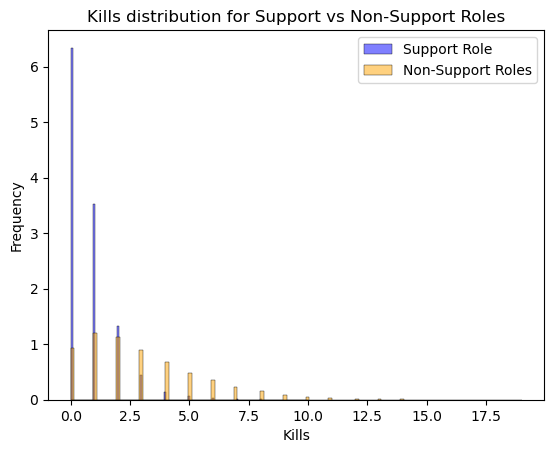

In [12]:
# Distribution du nombre de kill pour le rôle de support et les autres rôles

sns.histplot(supportdf['Kills'], color='blue', alpha=0.5, label='Support Role', stat='density')
sns.histplot(notsupportdf['Kills'], color='orange', alpha=0.5, label='Non-Support Roles', stat='density')

plt.xlabel('Kills')
plt.ylabel('Frequency')
plt.title('Kills distribution for Support vs Non-Support Roles')

plt.legend()
plt.show()

On voit bien que le role de support ont en général moins de kill que les autres rôles

## Visualisation du role d'ADC

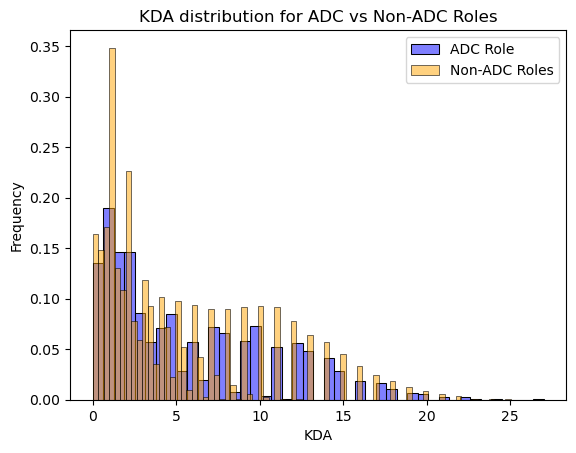

ADC Role
count    13168.000000
mean         5.623071
std          4.876855
min          0.000000
25%          1.500000
50%          4.000000
75%          9.000000
max         27.000000
Name: KDA, dtype: float64


In [13]:
# Distribution du KDA pour les ADC et les autres rôles

adcdf = df[df['Role'] == 'ADC']
notadcdf = df[df['Role'] != 'ADC']

sns.histplot(adcdf['KDA'], color='blue', alpha=0.5, label='ADC Role', stat='density')
sns.histplot(notadcdf['KDA'], color='orange', alpha=0.5, label='Non-ADC Roles', stat='density')

plt.xlabel('KDA')
plt.ylabel('Frequency')
plt.title('KDA distribution for ADC vs Non-ADC Roles')

plt.legend()
plt.show()

# mean, std

print("ADC Role")
print(adcdf['KDA'].describe())

Les ADC semble avoir un haut KDA, dû au rôle intrinsèque d'ADC qui en générale gravite autour de ne pas mourir en début de game et accumuler du gold pour acheter des items qui permettent d'atteindre des pics de puissance pour permettre d'infliger beaucoup de dégâts.

Ils ont une certaine importance dans les combats en 5v5 où il est assez important que le ADC reste vivant pour infliger les dégats à l'ennemi, l'intérêt de l'ennemi est biensur de tuer l'ADC adverse pour diminuer le potentiel létal de l'équipe adverse pendant le teamfight.

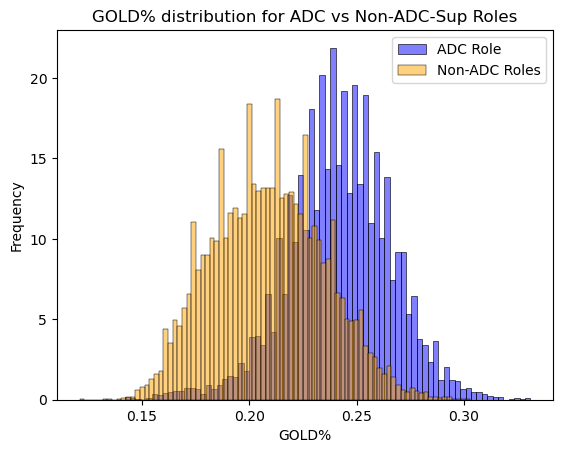

In [14]:
# Distribution du GOLD% pour les ADC et les autres rôles

notadcsup = df[(df['Role'] != 'ADC') & (df['Role'] != 'SUPPORT')]

sns.histplot(adcdf['GOLD%'], color='blue', alpha=0.5, label='ADC Role', stat='density')
sns.histplot(notadcsup['GOLD%'], color='orange', alpha=0.5, label='Non-ADC Roles', stat='density')

plt.xlabel('GOLD%')
plt.ylabel('Frequency')
plt.title('GOLD% distribution for ADC vs Non-ADC-Sup Roles')

plt.legend()

## Clustering des profils de support

In [15]:
# Clustering pour les roles de support

from sklearn.cluster import KMeans

pd.set_option('future.no_silent_downcasting', True)

# On ne garde que les variables numériques
supportdf = df[df['Role'] == 'SUPPORT'].copy()
supportdf = supportdf.drop(columns=['Game ID', 'Role', 'Region', 'Year'])
# On transforme les victoires en 0 et 1
supportdf['Victory'] = supportdf['Victory'].replace({True: 1, False: 0}).astype('int')
supportdf_clustering = supportdf.select_dtypes(include='number').copy()

scaler = preprocessing.StandardScaler()
supportdf_clustering[:] = scaler.fit_transform(supportdf_clustering)

kmeans = KMeans(n_clusters=7, n_init='auto')
supportdf_clustering['Cluster'] = kmeans.fit_predict(supportdf_clustering)

#sns.pairplot(supportdf_clustering, hue='Cluster')
#plt.show()

/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/3778138981.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.70524811 -0.70524811 -0.70524811 ...  0.24870229 -0.70524811
  0.24870229]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  supportdf_clustering[:] = scaler.fit_transform(supportdf_clustering)
/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/3778138981.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.09492343 -1.43750618  0.09492343 ...  0.09492343  1.62735304
  0.09492343]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  supportdf_clustering[:] = scaler.fit_transform(supportdf_clustering)
/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/3778138981.py:15: FutureWarning: Setting an item of incom

In [16]:
# Extraction des caractéristiques des clusters

cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=supportdf_clustering.columns[:-1])
cluster_centers['Cluster'] = range(7)
print(cluster_centers)

# Enregistrement des clusters dans un fichier CSV

supportdf_clustering.to_csv('../data/support_clusters.csv')

    Victory  Game Duration     Kills    Deaths    Assists       KDA  \
0  0.135241      33.428784  0.347529  3.511053   4.508778  1.781567   
1  0.721919      33.299077  1.194111  1.615049  11.263904  9.178626   
2  0.686396      35.878420  1.023852  2.196996   9.274735  6.400618   
3  0.675439      32.944839  3.058480  1.833333   8.564327  8.183333   
4  0.567338      40.321217  0.843584  4.098621  10.979321  3.743425   
5  0.043763      28.235898  0.362781  3.751738   3.372188  1.236687   
6  0.985460      29.829072  0.856973  1.412166  11.550445  9.206499   

          CS  CS in Team's Jungle       CSM         Golds  ...  Penta kills  \
0  35.322172             0.106957  1.071229   6991.323797  ...          0.0   
1  17.219193             0.572519  0.520611   8349.001091  ...          0.0   
2  47.140459             0.313604  1.328622   8840.433746  ...          0.0   
3  62.754386             7.049708  1.864912  10576.964912  ...          0.0   
4  37.948568             0.177625  0

In [17]:
# Visualisation des caractéristiques des clusters et highlight des caractéristiques les plus importantes pour chaque cluster

#fig, axes = plt.subplots(7, 1, figsize=(10, 30))
#for i in range(7):
#    sns.barplot(x=cluster_centers.columns[:-1], y=cluster_centers.iloc[i, :-1], ax=axes[i])
#    axes[i].set_title(f"Cluster {i}")
#    axes[i].set_ylabel('Value')
#    axes[i].set_xlabel('Feature')
#    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
#plt.tight_layout()
#plt.show()

In [18]:
# Moyenne victoire par cluster

for cluster in range(7):
    print(f"Cluster {cluster}")
    print(supportdf_clustering[supportdf_clustering['Cluster'] == cluster]['Victory'].mean())

Cluster 0
-0.729518855656697
Cluster 1
0.44383860414394766
Cluster 2
0.37279151943462896
Cluster 3
0.3508771929824561
Cluster 4
0.13467656415694593
Cluster 5
-0.9124744376278119
Cluster 6
0.970919881305638


In [19]:
print(supportdf_clustering)

        Victory  Game Duration     Kills    Deaths   Assists       KDA  \
Column                                                                   
4            -1      -0.380480 -0.705248  0.094923 -1.210452 -0.878096   
9             1      -0.380480 -0.705248 -1.437506 -0.002431  0.633697   
4            -1      -0.478429 -0.705248  0.094923 -1.411788 -0.960934   
9             1      -0.478429 -0.705248 -1.437506  0.601579  1.254981   
4            -1      -1.198277  0.248702  0.605733 -0.807778 -0.753839   
...         ...            ...       ...       ...       ...       ...   
9            -1       3.126340  0.248702 -0.415886 -0.807778 -0.505325   
4             1       0.275969 -0.705248  1.627353  1.809600 -0.443197   
9            -1       0.275969  0.248702  0.094923  0.198906 -0.339649   
4             1       0.275969 -0.705248  1.627353  1.809600 -0.443197   
9            -1       0.275969  0.248702  0.094923  0.198906 -0.339649   

              CS  CS in Team's Jungle

In [20]:
# Inverse transform pour obtenir les valeurs originales

supportdf['Cluster'] = supportdf_clustering['Cluster']

# Counting keria's assigned cluster for each of his games

print(supportdf['Cluster'].value_counts())
print("Keria : ")
print(supportdf[supportdf['Player'] == 'Keria']['Cluster'].value_counts())
print(supportdf[supportdf['Player'] == 'Keria']['Victory'].value_counts())

# Lehends :

print("Doss : ")
print(supportdf[supportdf['Player'] == 'Kaiser']['Cluster'].value_counts())
print(supportdf[supportdf['Player'] == 'Kaiser']['Victory'].value_counts())

Cluster
6    3370
0    3076
5    2445
4    1886
2    1132
1     917
3     342
Name: count, dtype: int64
Keria : 
Cluster
6    166
0    118
4     75
1     74
2     56
5     37
3     14
Name: count, dtype: int64
Victory
1    357
0    183
Name: count, dtype: int64
Doss : 
Cluster
6    123
0     95
4     71
5     60
2     41
1     25
Name: count, dtype: int64
Victory
1    228
0    187
Name: count, dtype: int64


# Clustering des midlaners

In [33]:
# Clustering des midlaners

middf = df[df['Role'] == 'MID'].copy()
middf = middf.drop(columns=['Game ID', 'Role', 'Region', 'Year'])
middf['Victory'] = middf['Victory'].replace({True: 1, False: 0}).astype('int')
middf_clustering = middf.select_dtypes(include='number').copy()

scaler = preprocessing.StandardScaler()
middf_clustering[:] = scaler.fit_transform(middf_clustering)

kmeans = KMeans(n_clusters=7, n_init='auto')
middf_clustering['Cluster'] = kmeans.fit_predict(middf_clustering)

middf['Cluster'] = middf_clustering['Cluster']

/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/3288105905.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.83495716 -0.83495716 -0.83495716 ... -0.43115535  0.78025011
 -0.43115535]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/3288105905.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.19186014 -0.19186014 -0.77224477 ...  3.29044765 -0.77224477
  3.29044765]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/3288105905.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.16517762 -0.33649499 -1.44140517 ... -0.88895008  0.49

In [34]:
print(middf['Cluster'].value_counts())

for cluster in range(7):
    print(f"Cluster {cluster}")
    print(middf_clustering[middf_clustering['Cluster'] == cluster]['Victory'].mean())

Cluster
1    3952
2    3857
3    2847
0    1821
4     568
6     109
5      14
Name: count, dtype: int64
Cluster 0
0.34761120263591433
Cluster 1
-0.5015182186234818
Cluster 2
0.9217008037334716
Cluster 3
-0.9669827889005971
Cluster 4
0.7746478873239436
Cluster 5
0.7142857142857143
Cluster 6
0.8899082568807339


In [35]:
# Counting Faker's assigned cluster for each of his games

print("Faker : ")
print(middf[middf['Player'] == 'Faker']['Cluster'].value_counts())
print(middf[middf['Player'] == 'Faker']['Victory'].value_counts())

# Chovy :

print("Chovy : ")
print(middf[middf['Player'] == 'Chovy']['Cluster'].value_counts())
print(middf[middf['Player'] == 'Chovy']['Victory'].value_counts())

# FIESTA :

print("Zeka : ")
print(middf[middf['Player'] == 'Zeka']['Cluster'].value_counts())
print(middf[middf['Player'] == 'Zeka']['Victory'].value_counts())

# 

Faker : 
Cluster
2    203
1    164
3     55
0     50
4     18
6      2
Name: count, dtype: int64
Victory
1    336
0    156
Name: count, dtype: int64
Chovy : 
Cluster
2    148
0    139
1    135
4     31
3     29
6      7
5      1
Name: count, dtype: int64
Victory
1    323
0    167
Name: count, dtype: int64
Zeka : 
Cluster
1    84
2    62
0    55
3    36
4    17
6     3
Name: count, dtype: int64
Victory
1    142
0    115
Name: count, dtype: int64


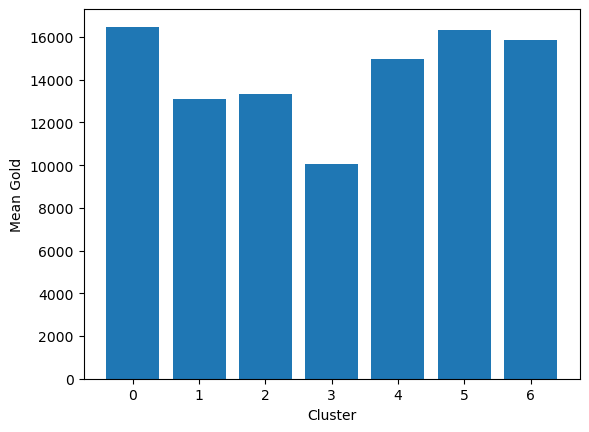

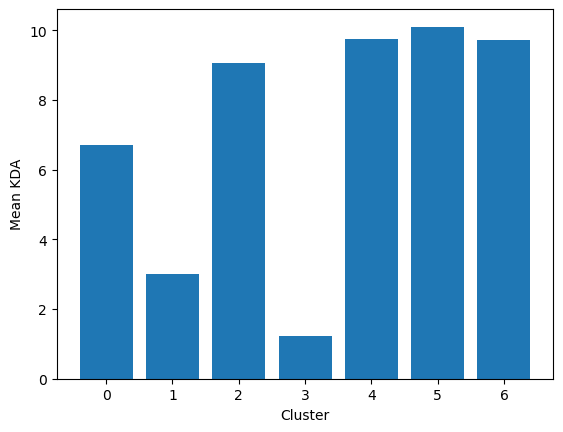

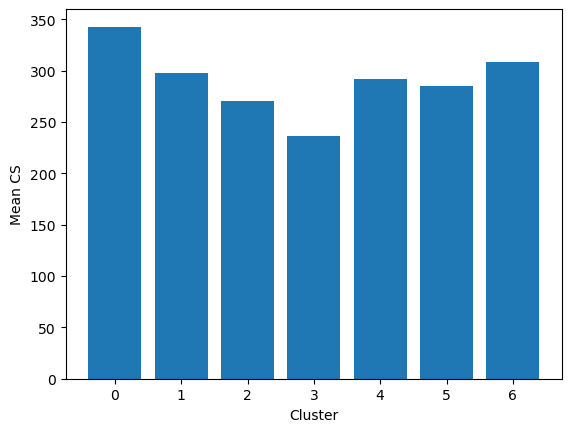

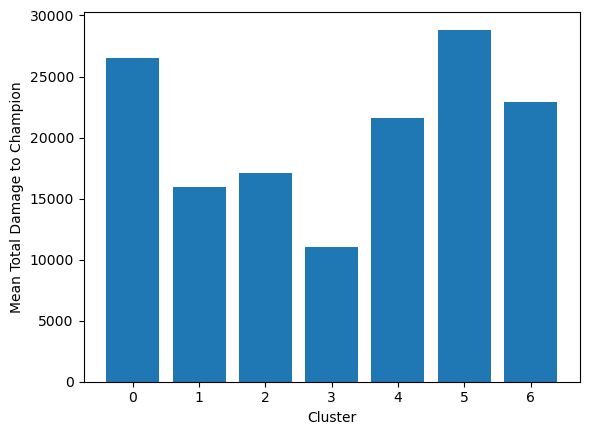

In [46]:
# Mean gold for each cluster plotted together

golds = []
for cluster in range(7):
    golds.append(middf[middf['Cluster'] == cluster]['Golds'].mean())

plt.bar(range(7), golds)
plt.xlabel('Cluster')
plt.ylabel('Mean Gold')
plt.show()

# Mean KDA for each cluster plotted together

kdas = []
for cluster in range(7):
    kdas.append(middf[middf['Cluster'] == cluster]['KDA'].mean())

plt.bar(range(7), kdas)
plt.xlabel('Cluster')
plt.ylabel('Mean KDA')
plt.show()

# Mean CS for each cluster plotted together

css = []
for cluster in range(7):
    css.append(middf[middf['Cluster'] == cluster]['CS'].mean())

plt.bar(range(7), css)
plt.xlabel('Cluster')
plt.ylabel('Mean CS')
plt.show()

# Mean total damage for each cluster plotted together

dmg = []
for cluster in range(7):
    dmg.append(middf[middf['Cluster'] == cluster]['Total damage to Champion'].mean())

plt.bar(range(7), dmg)
plt.xlabel('Cluster')
plt.ylabel('Mean Total Damage to Champion')
plt.show()

# Scatterplot for Gold vs. Damage for each cluster together

import plotly.express as px

fig = px.scatter(middf, x='Golds', y='Total damage to Champion', color='Cluster', 
                 hover_name=middf.index, title="Gold vs. Damage for each cluster", 
                 labels={'Golds': 'Gold', 'Total damage to Champion': 'Total Damage to Champion', 'Cluster': 'Cluster'})
fig.show()

# Scatter plot for CS vs. KDA for each cluster together

fig = px.scatter(middf, x='CS', y='KDA', color='Cluster', 
                 hover_name=middf.index, title="CS vs. KDA for each cluster", 
                 labels={'CS': 'CS', 'KDA': 'KDA', 'Cluster': 'Cluster'})
fig.show()

# Scatter plot game CS vs Kills for each cluster together

fig = px.scatter(middf, x='CS', y='Kills', color='Cluster',
                    hover_name=middf.index, title="CS vs Kills for each cluster",
                    labels={'CS': 'CS', 'Kills': 'Kills', 'Cluster': 'Cluster'})
fig.show()

# Scatter plot game Deaths vs gold for each cluster together

fig = px.scatter(middf, x='Deaths', y='Golds', color='Cluster',
                    hover_name=middf.index, title="Deaths vs Golds for each cluster",
                    labels={'Deaths': 'Deaths', 'Golds': 'Golds', 'Cluster': 'Cluster'})
fig.show()

# Scatter plot CSD@15 vs CS for each cluster together

fig = px.scatter(middf, x='CSD@15', y='CS', color='Cluster',
                    hover_name=middf.index, title="CSD@15 vs CS for each cluster",
                    labels={'CSD@15': 'CSD@15', 'CS': 'CS', 'Cluster': 'Cluster'})
fig.show()

# CSD@15 vs CS vs game duration for each cluster together

fig = px.scatter_3d(middf, x='CSD@15', y='CS', z='Game Duration', color='Cluster',
                    hover_name=middf.index, title="CSD@15 vs CS vs Game Duration for each cluster",
                    labels={'CSD@15': 'CSD@15', 'CS': 'CS', 'Game Duration': 'Game Duration', 'Cluster': 'Cluster'},
                    symbol_sequence=['circle', 'x', 'square', 'diamond', 'cross', 'triangle-up', 'triangle-down'])
fig.update_traces(marker_size = 1)
fig.show()

In [48]:
df_avg = df.groupby('Player').mean(numeric_only=True).drop(['Game ID', 'Year'], axis=1)

# Fit KMeans clustering on the average stats of each player

scaler = preprocessing.StandardScaler()
df_avg[:] = scaler.fit_transform(df_avg)

kmeans = KMeans(n_clusters=7, n_init='auto')
df_avg['Cluster'] = kmeans.fit_predict(df_avg)

# Counting the number of players in each cluster

print(df_avg['Cluster'].value_counts())

Cluster
3    128
1    122
5    119
0     94
6     67
4     48
2     29
Name: count, dtype: int64


## Clustering de l'ensemble

In [57]:
fulldf = df.copy()
fulldf.drop(columns=['Game ID', 'Year'], inplace=True)
fulldf['Victory'] = fulldf['Victory'].replace({True: 1, False: 0}).astype('int')
fulldf_clustering = fulldf.select_dtypes(include='number').copy()

scaler = preprocessing.StandardScaler()
fulldf_clustering[:] = scaler.fit_transform(fulldf_clustering)

kmeans = KMeans(n_clusters=7, n_init='auto')
fulldf_clustering['Cluster'] = kmeans.fit_predict(fulldf_clustering)

fulldf['Cluster'] = fulldf_clustering['Cluster']

/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/1456168779.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.60927006  0.20678358 -0.60927006 ... -0.20124324  1.83889085
 -0.60927006]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/1456168779.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.8319898   0.27771157 -0.27656665 ...  3.0491027   1.94054625
  0.27771157]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/2g/864rmr6d0s92fpb58tnrmd0r0000gn/T/ipykernel_50212/1456168779.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.16559159 -0.92227034 -1.16559159 ... -0.92227034 -0.92227

In [56]:
# Cluster distribution for each role on a histogram (All games)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize subplots with shared y-axes
fig = make_subplots(rows=5, cols=1, subplot_titles=pd.unique(df['Role']))

# Iterate over roles
for i, role in enumerate(pd.unique(df['Role'])):
    role_df = fulldf[fulldf['Role'] == role]
    
    
    # Create histogram trace for each role
    fig.add_trace(
        go.Histogram(x=role_df['Cluster'], marker_color='skyblue', name='Cluster'),
        row=i+1, col=1
    )
    
    # Customize subplot titles, axes labels, and layout
    fig.update_xaxes(title_text='Cluster', row=i+1, col=1)
    fig.update_yaxes(title_text='Frequency', row=i+1, col=1)
    fig.update_layout(title_text=f"{role} Clustering Distribution", showlegend=False)

# Update layout for better visualization
fig.update_layout(height=1200, width=800, title_font_size=24)

# Show the plot
fig.show()


KeyError: 'Cluster'